<a href="https://colab.research.google.com/github/aadhil96/Popular-Unsupervised-Clustering-Algorithms/blob/main/Popular_Unsupervised_Clustering_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


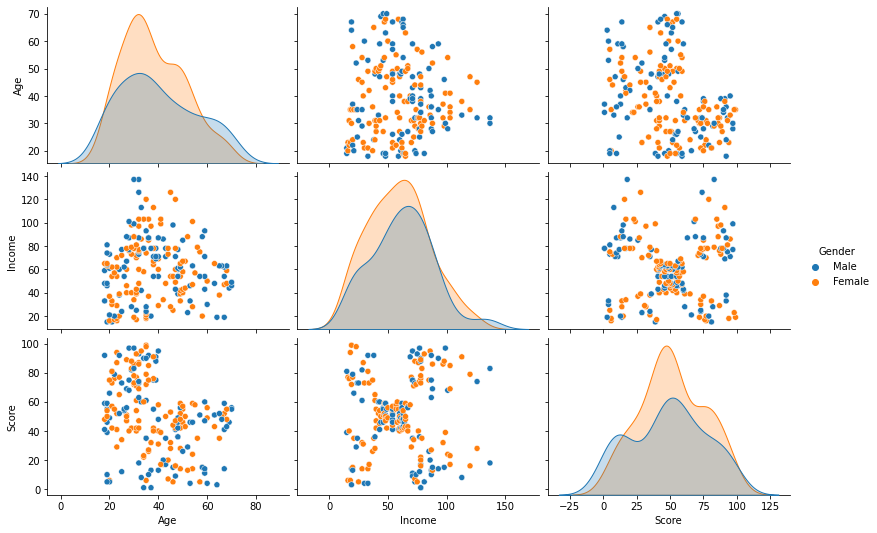

In [5]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

## **K Means**

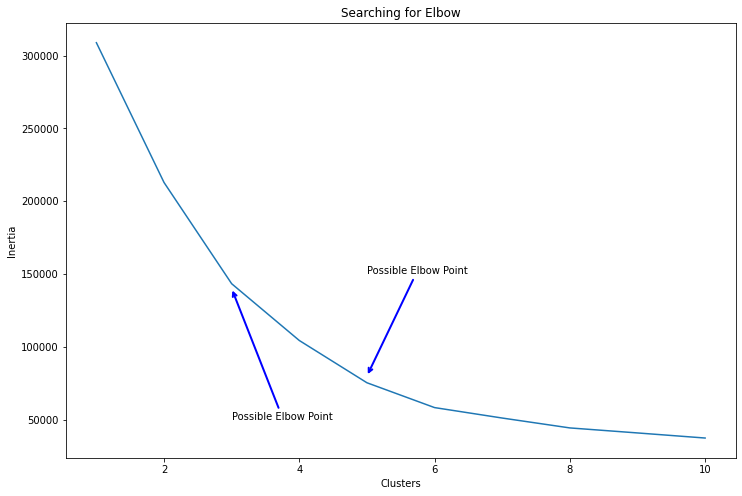

In [6]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

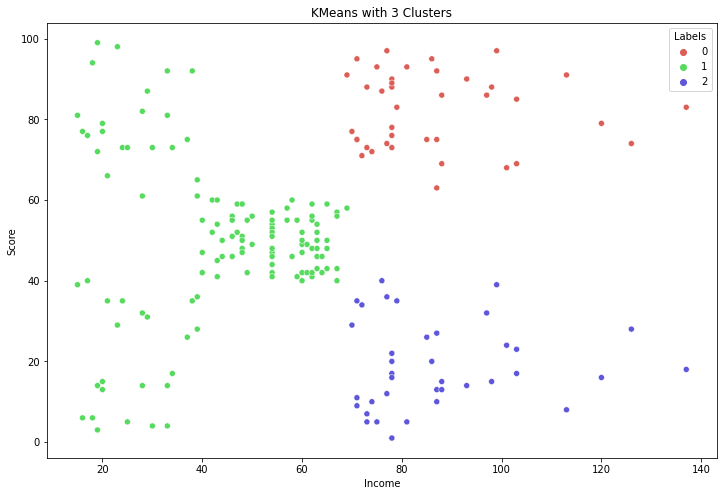

In [7]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

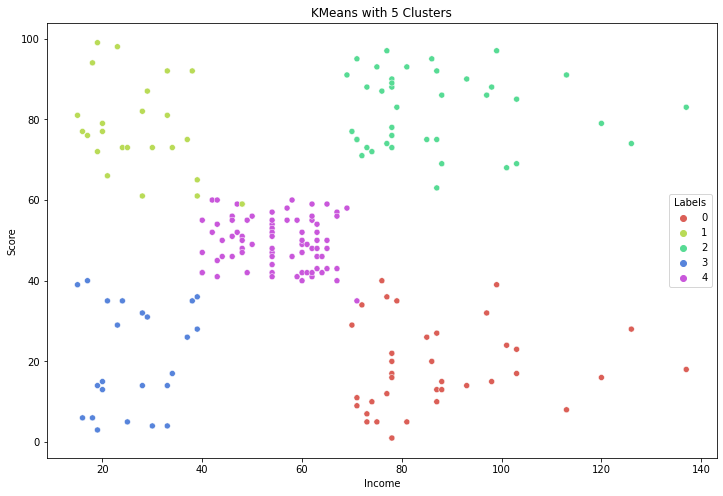

In [8]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

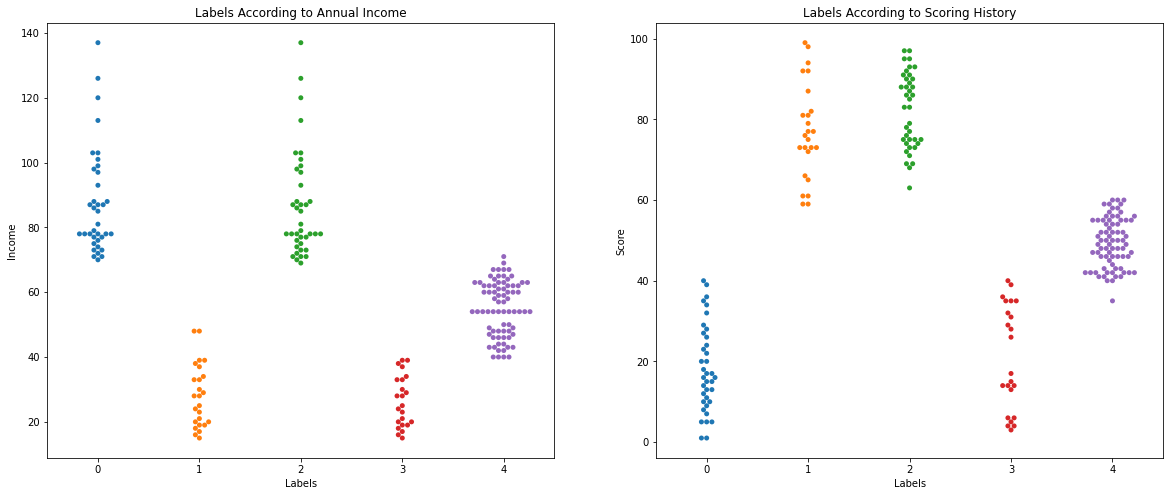

In [9]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

## **Hierarchical Clustering**

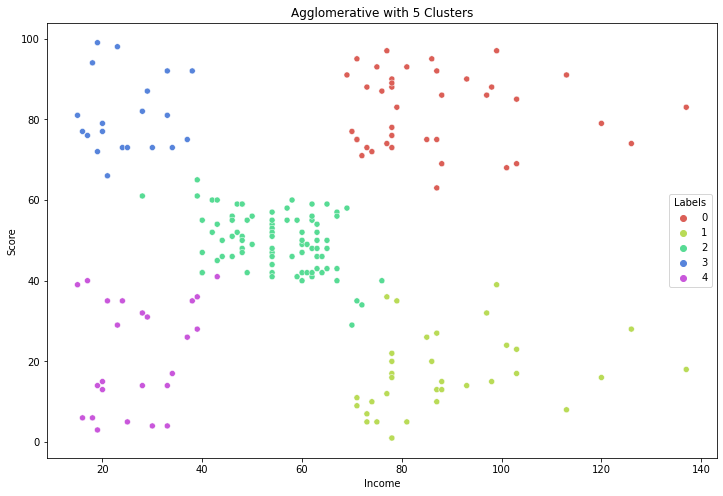

In [10]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

In [11]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.17934972 124.51104369
  130.21904623]
 [ 42.05948169   0.          75.01999733 ... 111.80339887 137.76066202
  122.38463956]
 [ 33.03028913  75.01999733   0.         ... 129.93844697 122.22111111
  143.82628411]
 ...
 [117.17934972 111.80339887 129.93844697 ...   0.          57.07889277
   14.35270009]
 [124.51104369 137.76066202 122.22111111 ...  57.07889277   0.
   65.03845017]
 [130.21904623 122.38463956 143.82628411 ...  14.35270009  65.03845017
    0.        ]]


In [12]:
Z = hierarchy.linkage(dist, 'complete')

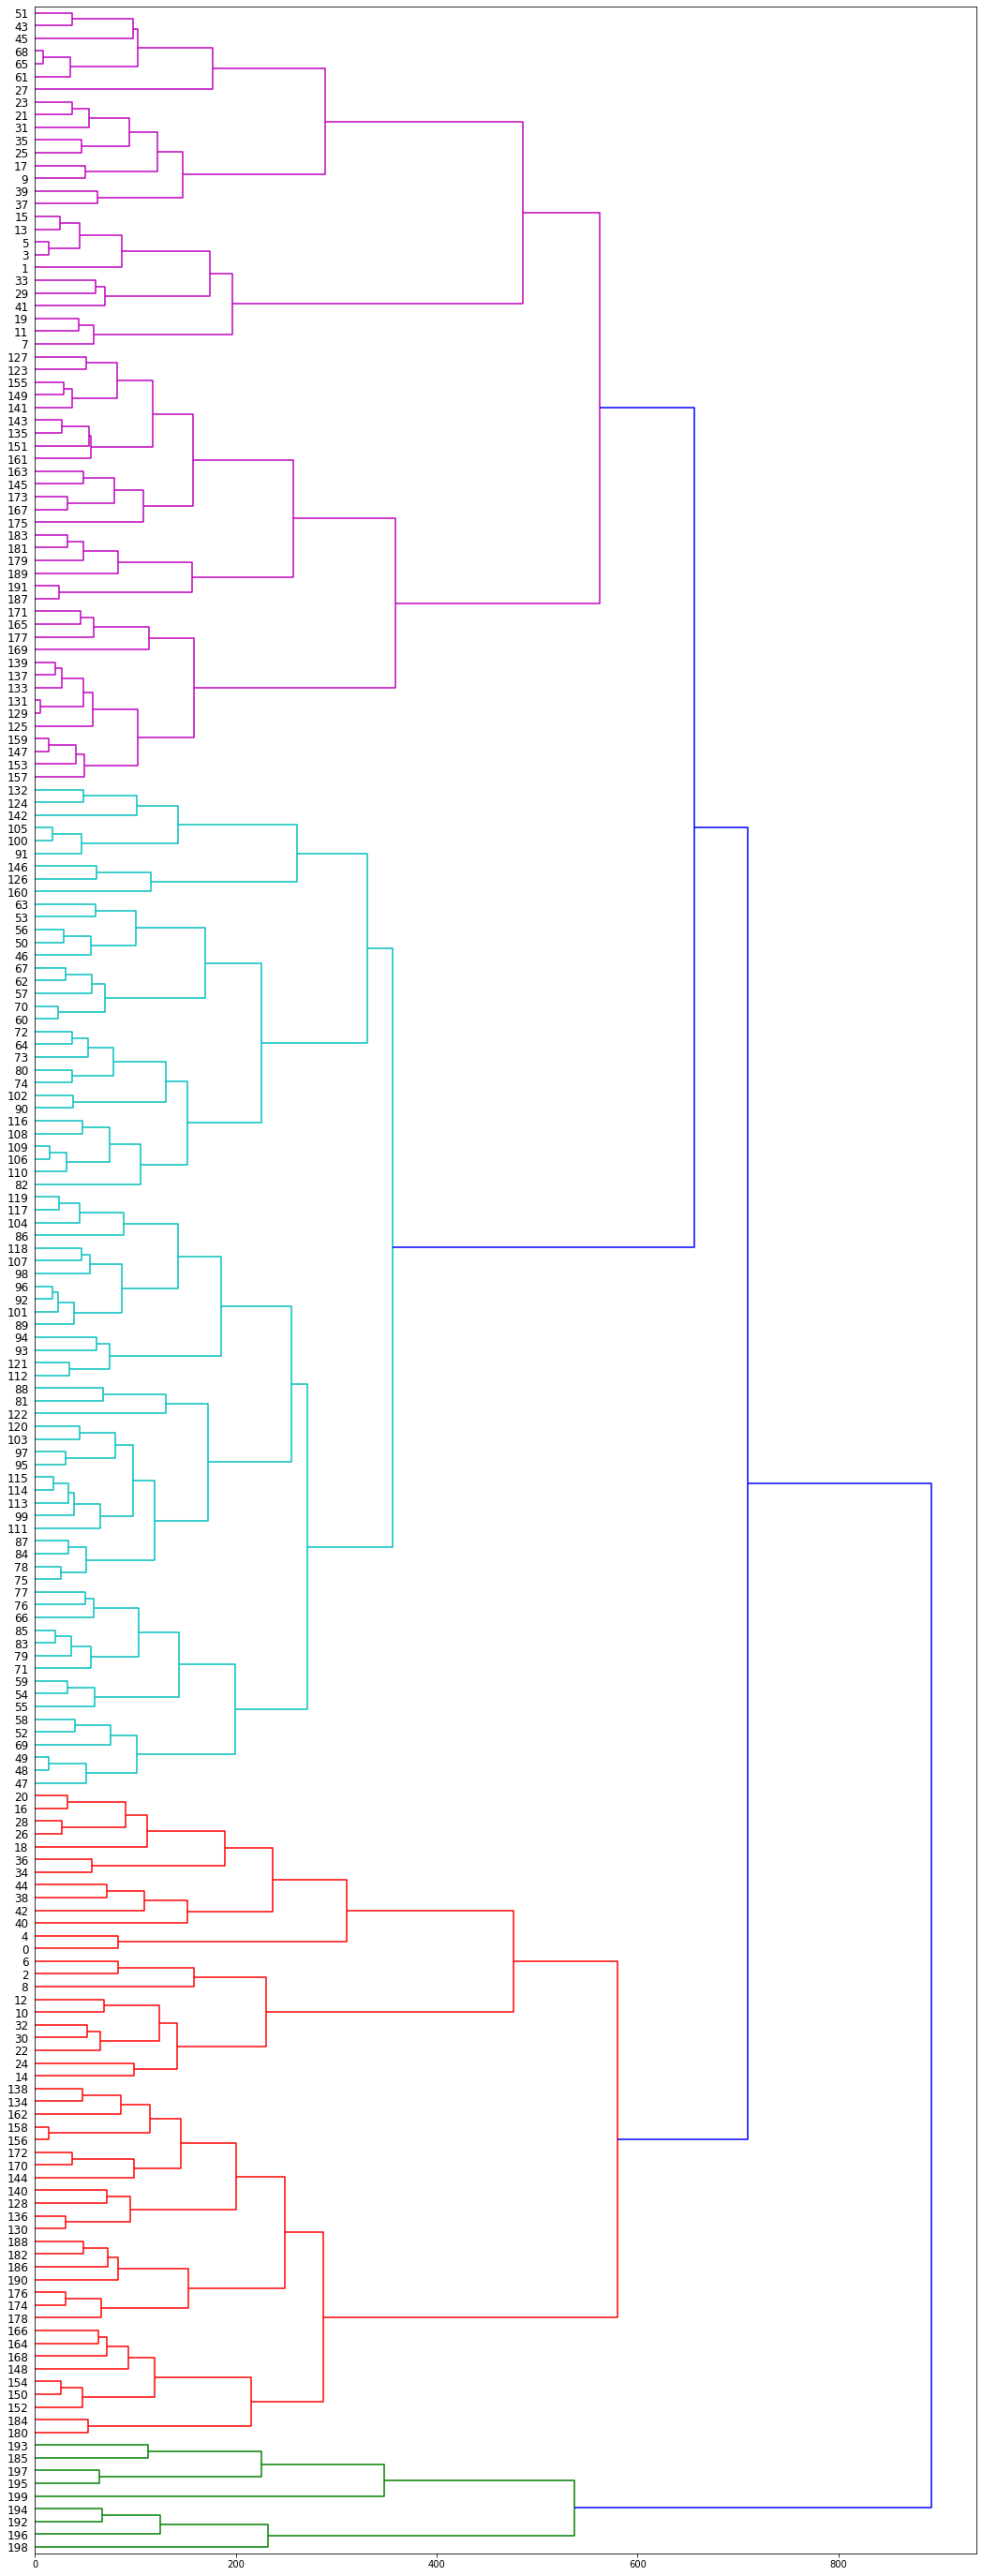

In [13]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

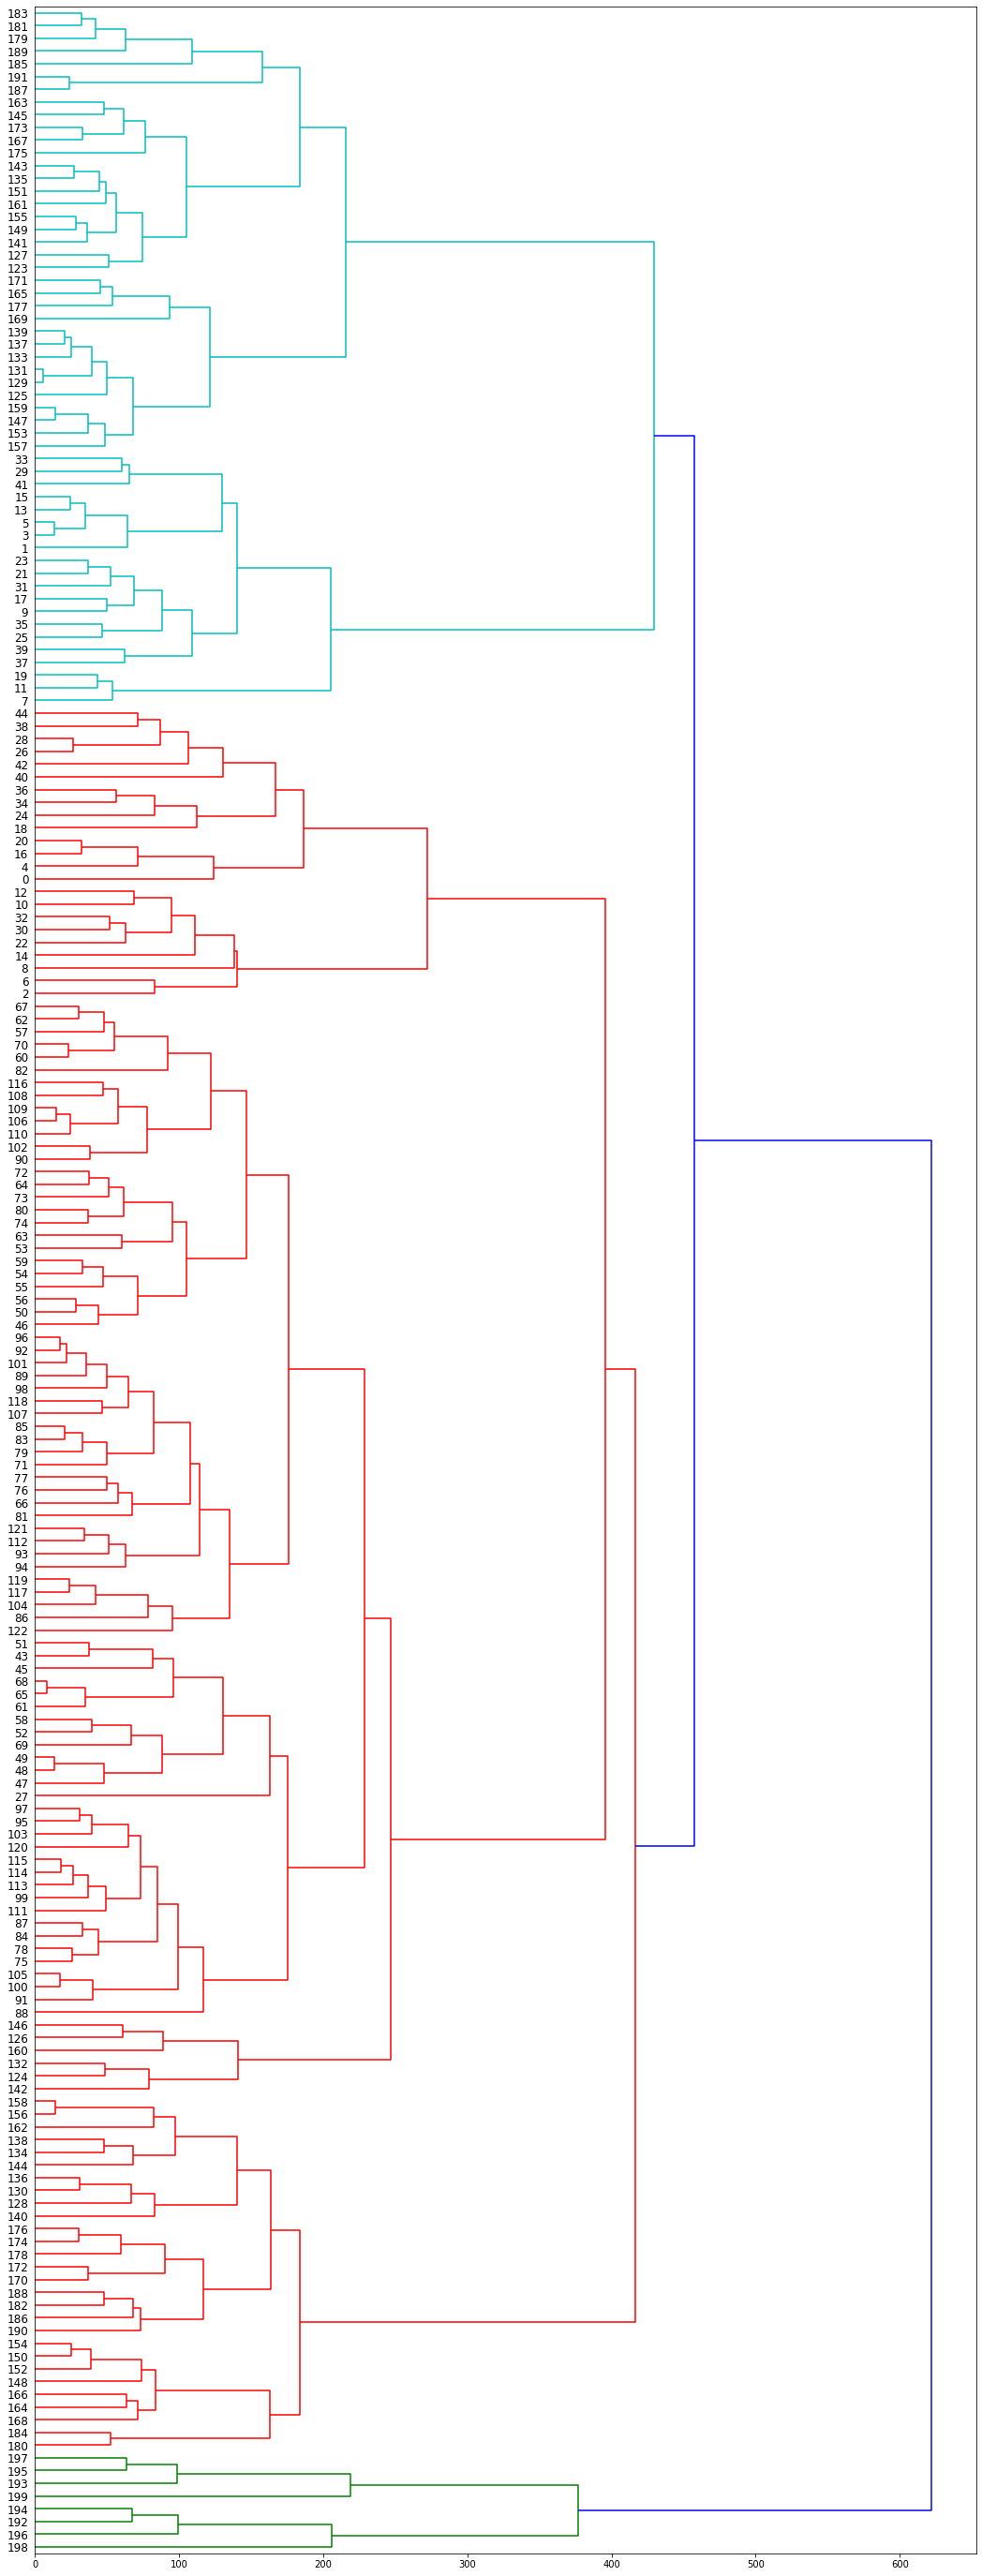

In [14]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## **Density Based Clustering (DBSCAN)**

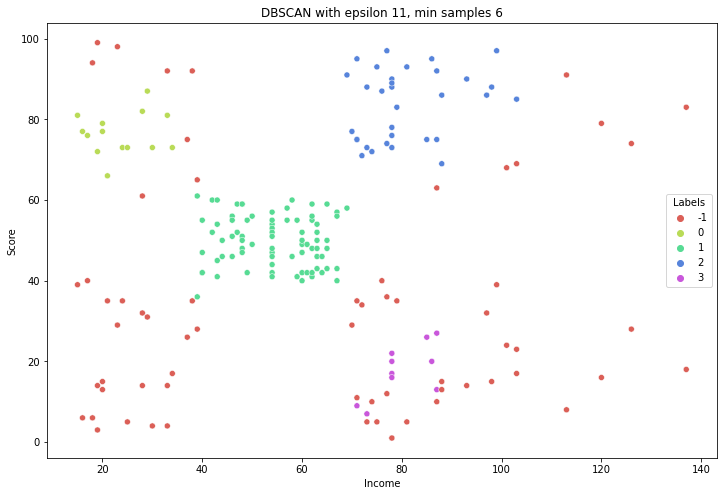

In [15]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

## **Mean Shift Algorithm**

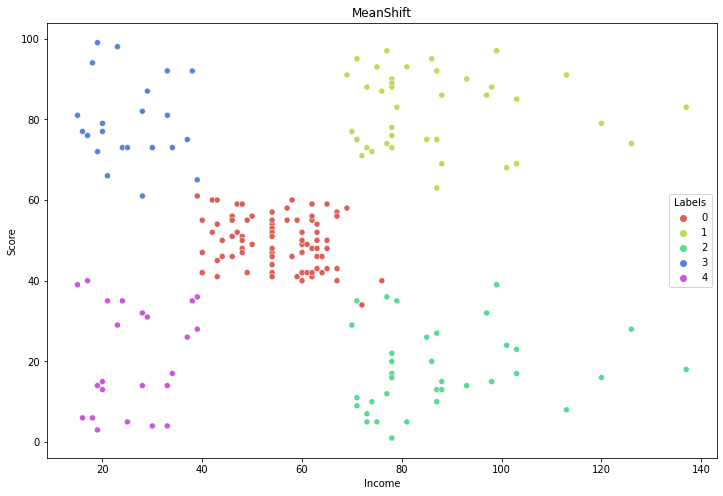

In [16]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

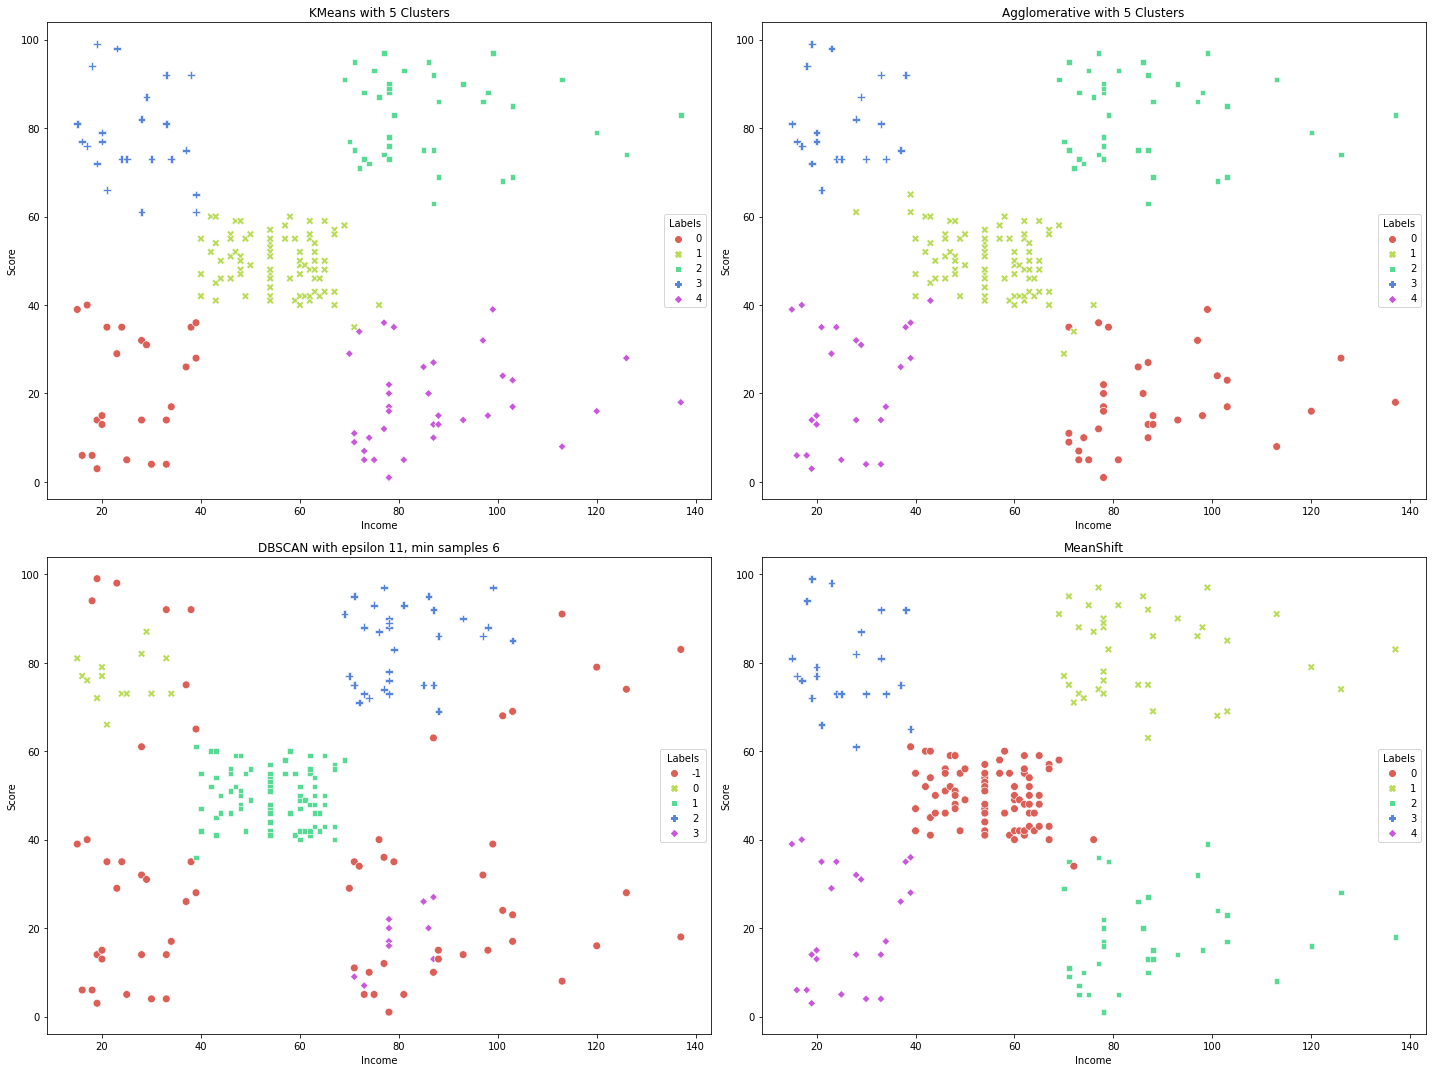

In [17]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()